<a href="https://colab.research.google.com/github/ghgit1798/2021-financial-competition/blob/Guhyeon/%EC%A2%85%ED%95%A9%EC%9C%A0%ED%86%B5_%EC%9D%B4%EC%83%81%EC%B9%98_%ED%8C%8C%EC%95%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 종합유통 이상치 파악
- 분석 이유는 클러스터링 시각화 결과가 비대칭적

In [25]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

pd.set_option('display.max_rows', 200)

In [4]:
sh = pd.read_csv("신한카드_업종대분류 전처리완료.csv", encoding='utf-8', index_col=0)

In [5]:
sh.describe()

,기준년월,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
count,23820.000000,23820.000000,23820.000000,23820.000000,2.382000e+04,2.382000e+04,2.382000e+04,2.382000e+04
mean,201956.296054,6.301973,4.896809,303.217548,2.002696e+09,5.383789e+04,3.225165e+07,1.980201e+05
std,50.088838,36.086236,27.963338,1515.821126,2.752366e+10,5.563938e+05,4.428092e+08,7.978691e+05
min,201903.000000,0.000000,0.000000,0.000000,-7.933527e+09,-9.520000e+02,-3.081982e+08,-8.146100e+05
25%,201909.000000,0.000000,0.000000,5.000000,6.182000e+06,5.800000e+01,5.838905e+05,2.466175e+04
50%,202003.000000,0.000000,0.000000,26.000000,5.476450e+07,7.540000e+02,1.311198e+06,5.879950e+04
75%,202009.000000,2.000000,2.000000,145.000000,3.559052e+08,6.081500e+03,3.109208e+06,1.492918e+05
max,202009.000000,1399.000000,1085.000000,56712.000000,1.664055e+12,3.293319e+07,2.032690e+10,2.588008e+07


### 이상치는 클러스터링에 반영한 5가지 변수에 대해 진행
1. 매출가맹점수
2. 카드매출금액
3. 카드매출건수
4. 점당매출금액
5. 건당매출금액

In [10]:
data = sh[sh['업종대분류']=='종합유통']

In [30]:
data.head(5)

,기준년월,광역시도명,업종대분류,업종중분류,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
319,201903,강원,종합유통,다단계판매,다단계,0,0,0,0,0,0,0
320,201903,강원,종합유통,마트/슈퍼마켓,대형마트,0,0,26,11517812000,236962,442992766,48606
321,201903,강원,종합유통,마트/슈퍼마켓,슈퍼마켓 기업형,0,0,30,1177091000,59052,39236373,19933
322,201903,강원,종합유통,마트/슈퍼마켓,슈퍼마켓 일반형,7,10,1144,9315398000,495263,8142830,18809
323,201903,강원,종합유통,면세점,면세점,0,0,2,17839000,222,8919655,80357


### 201903월에 모든 값이 0인 종합유통 존재

In [27]:
out = data[data['매출가맹점수']==0]

In [29]:
out[out['기준년월']==201903].head(3)

,기준년월,광역시도명,업종대분류,업종중분류,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
319,201903,강원,종합유통,다단계판매,다단계,0,0,0,0,0,0,0
328,201903,강원,종합유통,온라인,홈쇼핑,0,0,0,0,0,0,0
1016,201903,경남,종합유통,온라인,홈쇼핑,0,0,0,0,0,0,0


### 확인 결과, 지역에 따라 0인 곳은 있어도, 카테고리 자체가 0인 곳은 존재하지 않음
- 대형이커머스 3월 출현

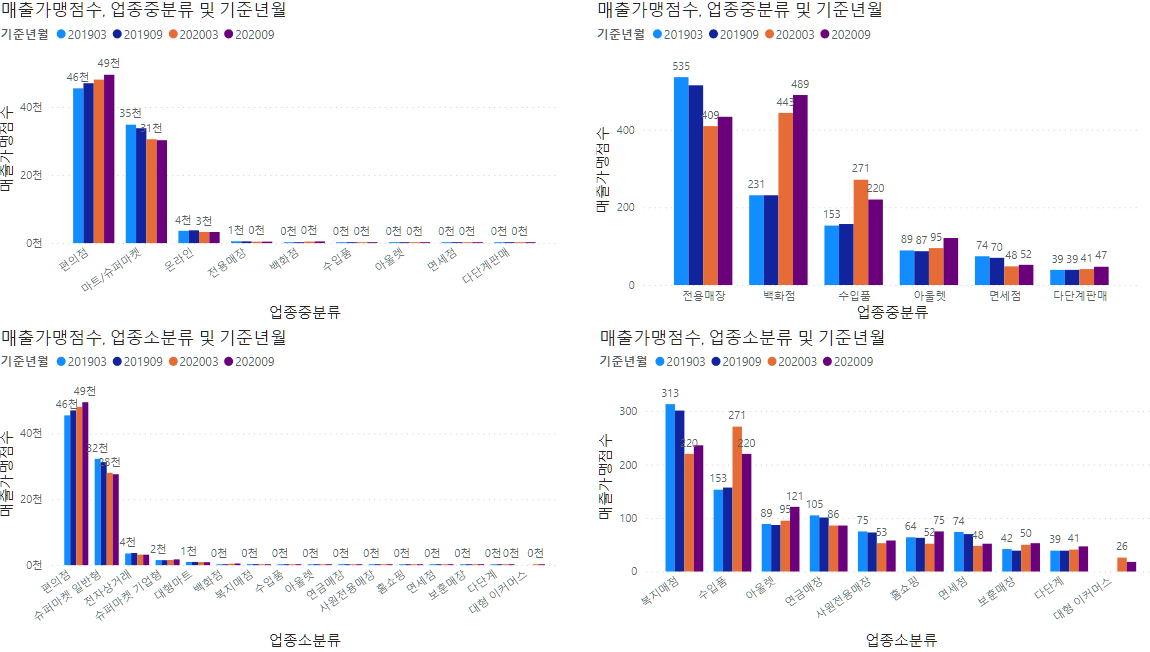  

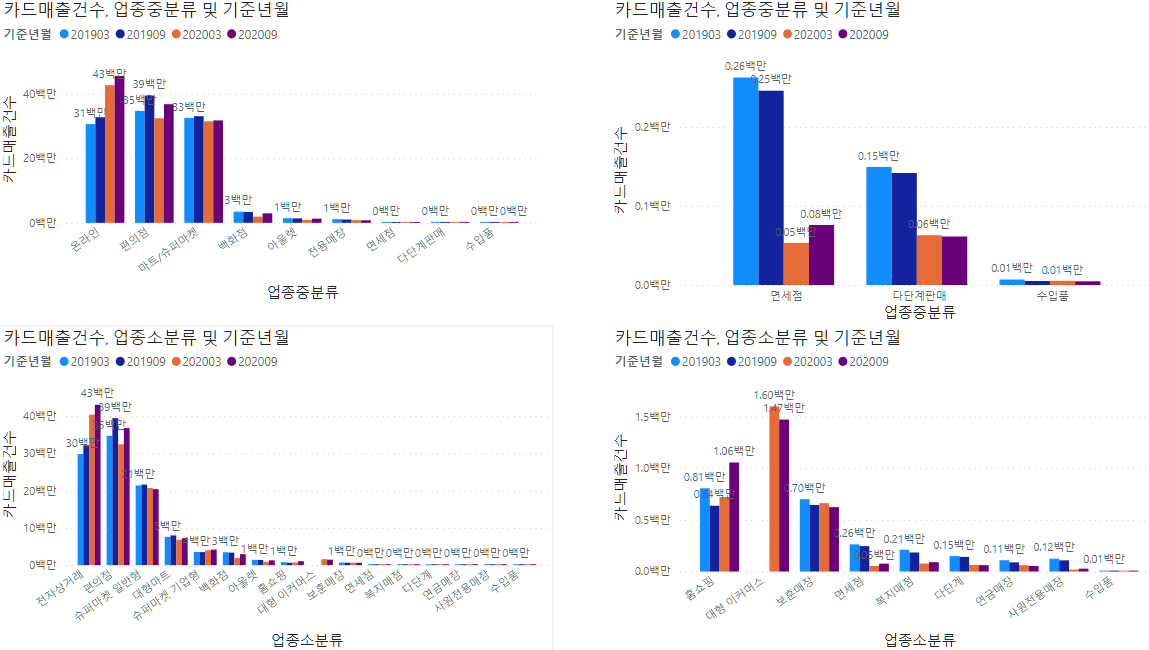

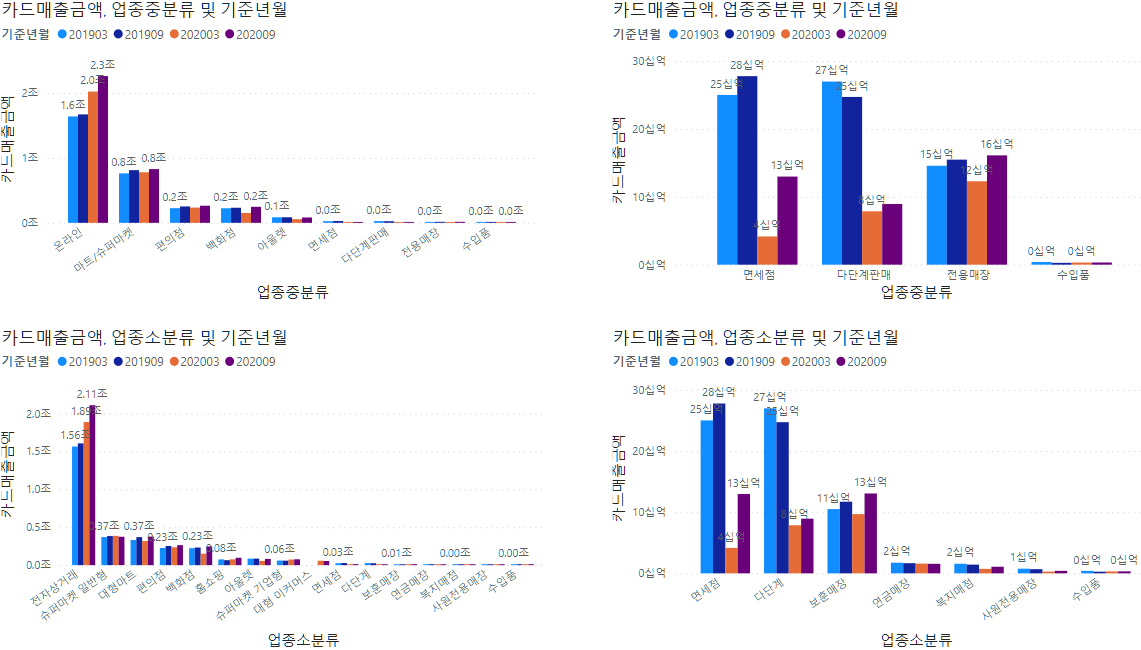

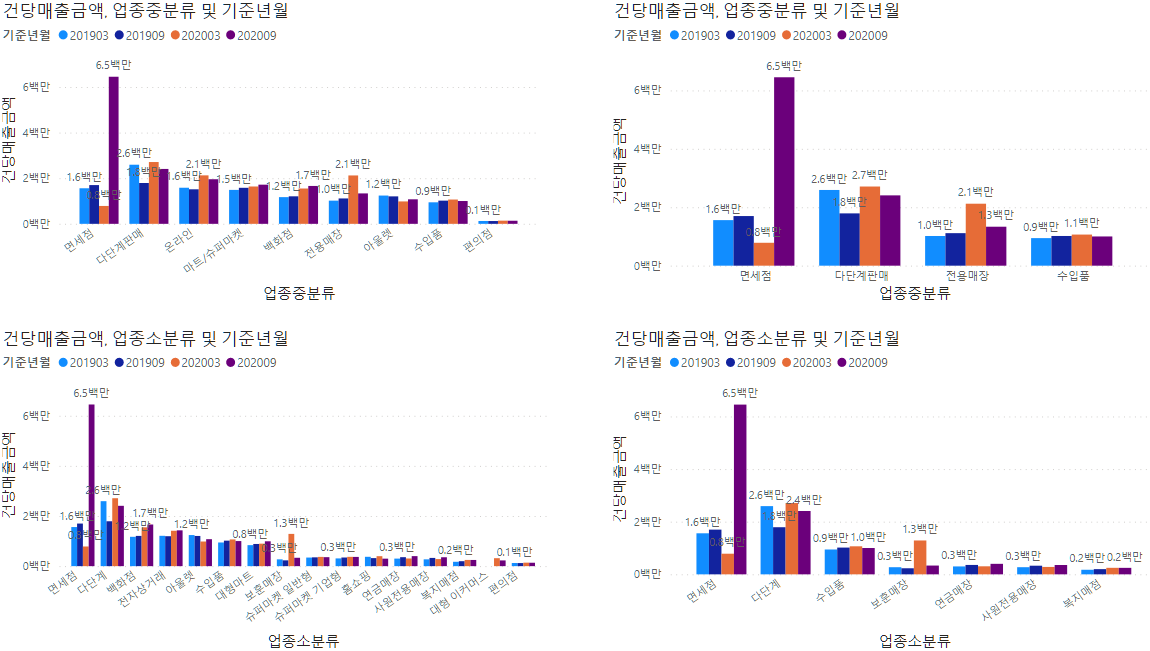

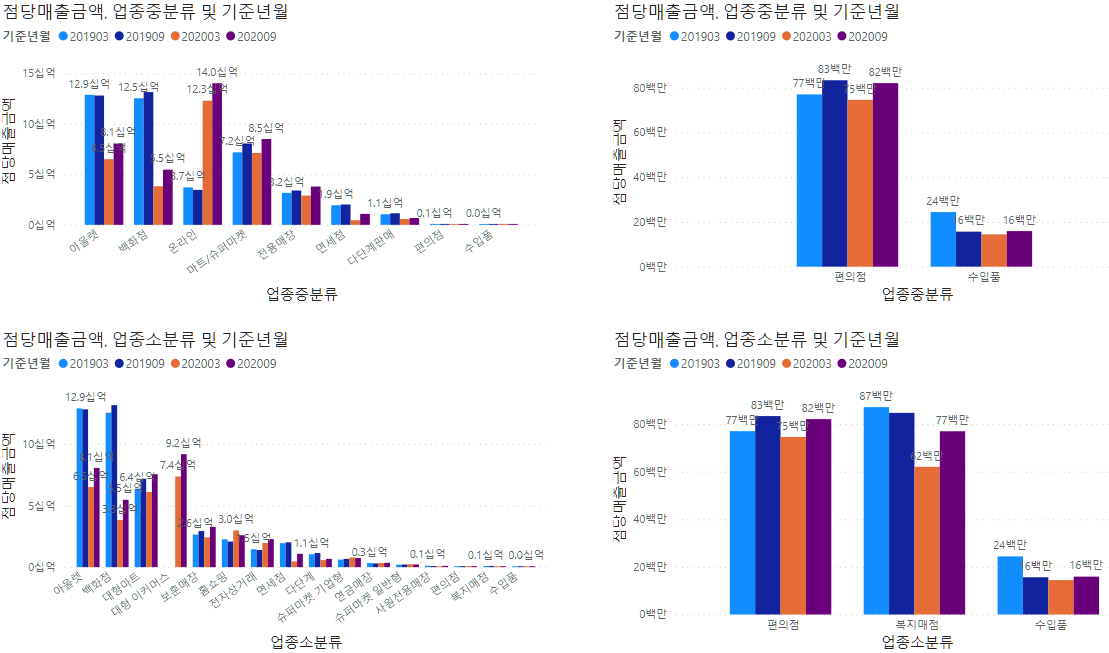

## Boxplot 적용
- 찍히는 값은 지역별 값(도시 수)  * 4 (기준년월)

In [17]:
cols = ['매출가맹점수','카드매출금액','카드매출건수','점당매출금액','건당매출금액']

In [38]:
max(data[data['업종중분류']=='마트/슈퍼마켓'].loc[:,'매출가맹점수'])

7029

In [50]:
tmp = data[data['업종중분류']=='마트/슈퍼마켓']
tmp.sort_values(by='매출가맹점수',ascending=False).head(5)

,기준년월,광역시도명,업종대분류,업종중분류,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
669,201903,경기,종합유통,마트/슈퍼마켓,슈퍼마켓 일반형,73,107,7029,97552871000,5094406,13878627,19149
6607,201909,경기,종합유통,마트/슈퍼마켓,슈퍼마켓 일반형,47,97,6778,103636233000,5259448,15290090,19705
12547,202003,경기,종합유통,마트/슈퍼마켓,슈퍼마켓 일반형,57,113,6228,105439431000,5183790,16929902,20340
18568,202009,경기,종합유통,마트/슈퍼마켓,슈퍼마켓 일반형,75,68,6091,102334678000,5067375,16800965,20195
3334,201903,서울,종합유통,마트/슈퍼마켓,슈퍼마켓 일반형,35,73,4520,89780941000,6505653,19863040,13800


In [20]:
for col in cols:
  fig = px.box(data, x='업종중분류' ,y=col, title=col)
  fig.show()